# Iris Dataset Analysis

### Robert Kraemer

### Import the dataset and explore and display the features of the dataset.

Import libraries used in the application.

In [7]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

Import the iris dataset from seaborn library.

In [8]:
iris = datasets.load_iris()

In [9]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [10]:
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [11]:
iris_df['target'] = iris_df['target'].replace(to_replace=[0,1,2],value=['setosa','versicolor','virginica'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Display information about the iris dataset.

In [12]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


As shown above, the iris dataset contains 150 data values of sepal_length, sepal_width, petal_length, petal_width, and species with no missing data values.

Get summary statistics of the entire iris dataset. The following returns the count, mean, standard deviation, minimum, maximum, and the first, second, and third quartiles of sepal length, sepal width, petal length, and petal width for the entire dataset

In [13]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Scatter plot, Sepal Length vs Sepal Width

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

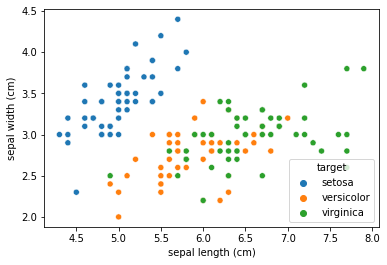

In [14]:
sns.scatterplot(x= "sepal length (cm)", y="sepal width (cm)", data= iris_df, hue = "target")

As we can see by the scatter plot, the Setosa's sepal length falls around 4.5-5.5cm while their sepal length ranges from 3.5 - 4.5cm. Versa tends to have a larger sepal length (5-7.0cm) when compared to its sepal width (2.0-3.5cm), while Verginica tends to have the largest sepal length (5-8.0cm) when compared to its sepal width (2.0-4.0). here does appear to be a possible positive relationship between sepal length and sepal width, especially when separated by species. There also appears to be more similarity between versicolor and virginica species.

### 3-D Scatter plot Sepal Length vs Sepal Width vs Petal Length

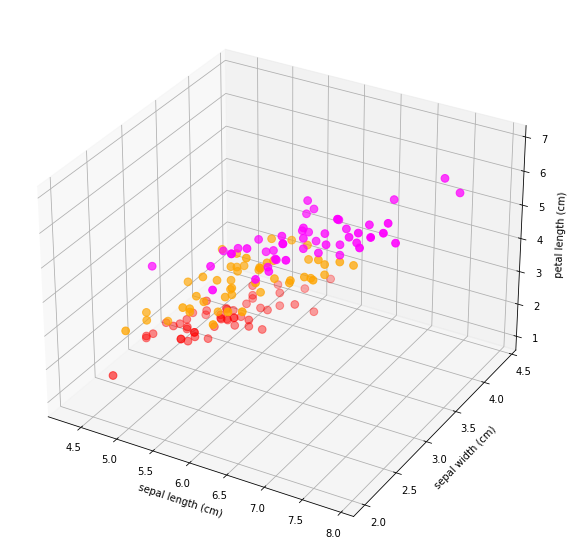

In [15]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
colors = {'setosa': 'red','versicolor':'orange','virginica':'magenta'}
ax.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], iris_df['petal length (cm)'], s=60, c=iris_df['target'].map(colors))
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')
ax.set_zlabel('petal length (cm)')
plt.show()

As we can see by the 3D scatter plot when adding the petal length, the Setosa's (red) has a smaller petal length and will tend to have small sepal length and width, Versa has the next largest petal length and sepal length/width, and Verginica has the largest petal lengths and sepal width/length. After adding petal length to the scatter plot, there is a more marked difference between setosa measurements and the other two species and there still appears to be a relationship between the variables.

### Description of the data set

In [16]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Description of dataset by species

In [17]:
iris_setosa = iris_df.loc[iris_df['target']=='setosa']
iris_versi = iris_df.loc[iris_df['target']=='versicolor']
iris_virginica = iris_df.loc[iris_df['target']=='virginica']

#### Setosa

In [18]:
iris_setosa.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


#### Versa

In [19]:
iris_versi.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


#### Virginica

In [20]:
iris_virginica.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


### Pair plot of Iris Dataset

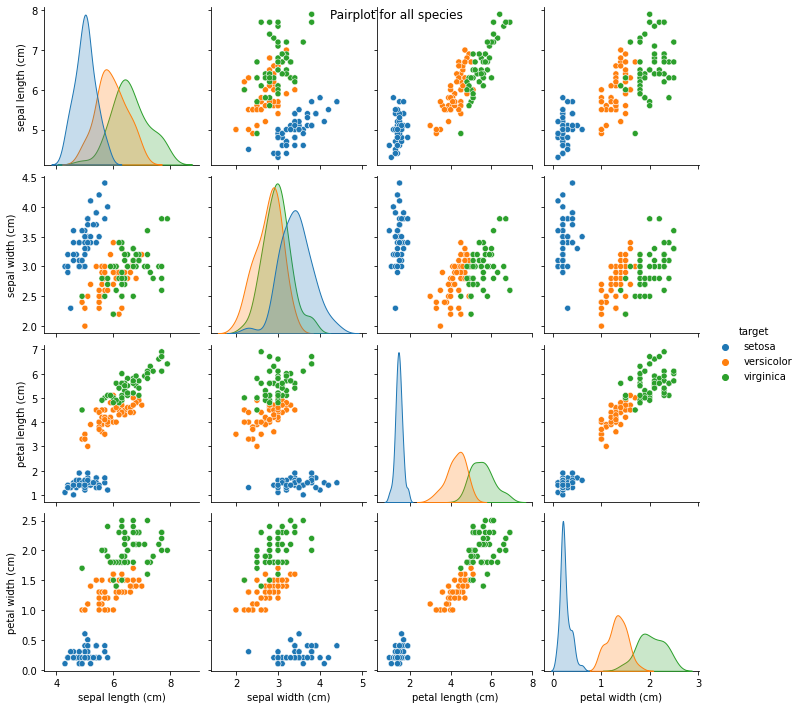

In [21]:
sns.pairplot(iris_df, kind='scatter',hue='target')
plt.suptitle('Pairplot for all species')
plt.show()

From the above pairplot there does appear to be a positive correlation between petal length and petal width for all species. The distributions for all of the measurements appear to be fairly normal and there appears to be more similarity between virginica and versicolor. There may also be relationships between other variables when separated by species.

### Pair plot and heat map by species

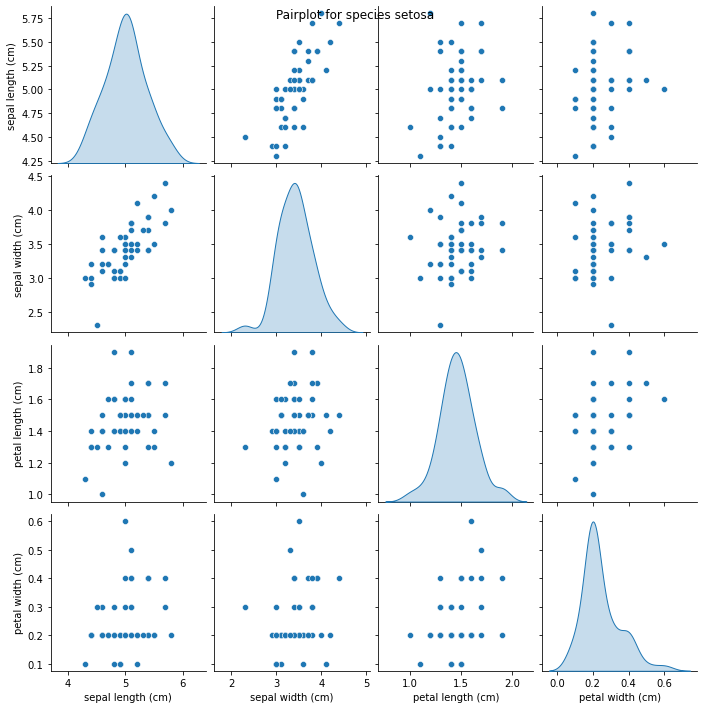

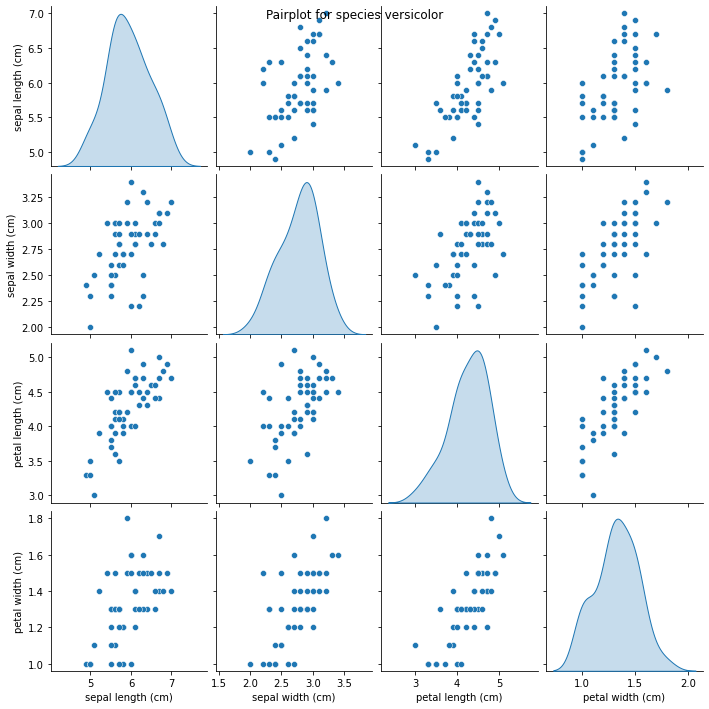

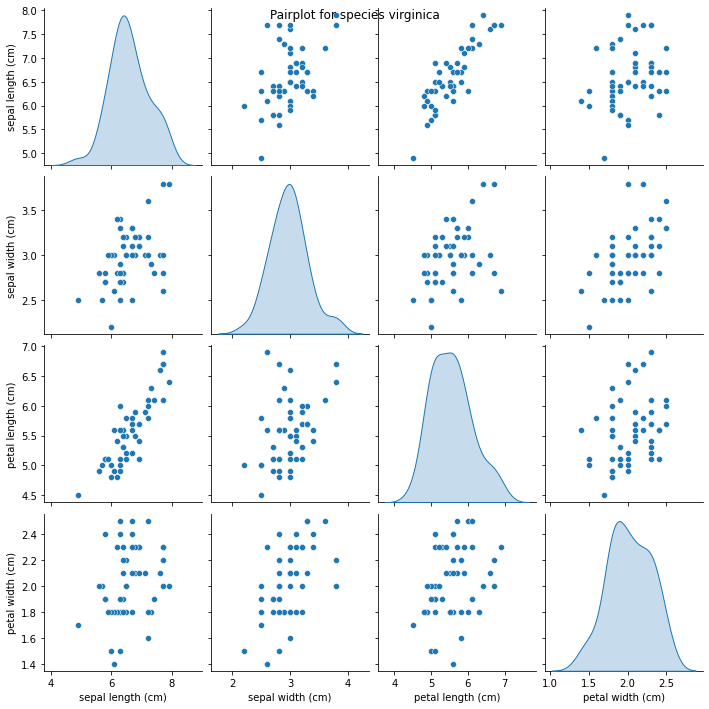

In [22]:
target = ["setosa", "versicolor", "virginica"]
for spec in sorted(target) :
    sns.pairplot(iris_df[iris_df['target']==spec],kind='scatter',diag_kind='kde')
    plt.suptitle('Pairplot for species {}'.format(spec))
    plt.show()

The pairplot for setosa shows the measurements are fairly normally distributed and there appears to be a possible relationship between sepal length and sepal width, while other relationships don't appear to be as strong. The pairplot for versicolor shows the measurements are fairly normally distributed and there appears to be a possible relationship between sepal length and sepal width as well as petal length and petal width. The pairplot for virginica shows the measurements are fairly normally distributed and there appears to be a possible relationship between sepal length and petal length.

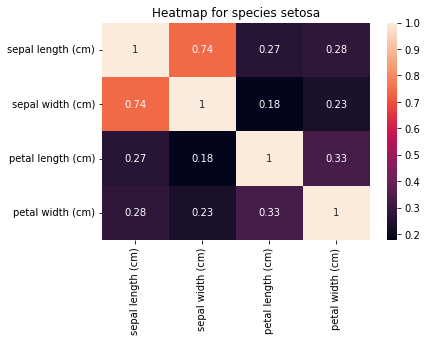

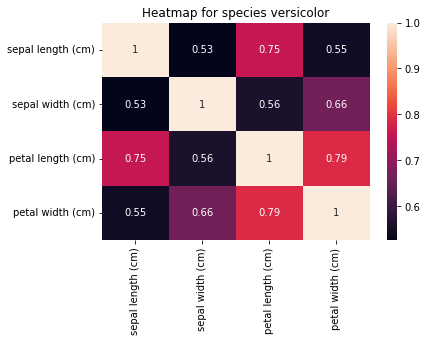

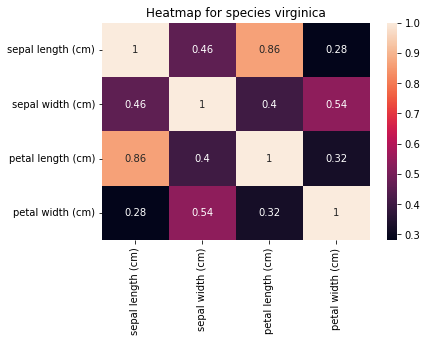

In [23]:
for spec in sorted(target):
    sns.heatmap(iris_df[iris_df['target']==spec].corr(), annot=True)
    plt.title('Heatmap for species {}'.format(spec))
    plt.show()

From the heatmaps above, there appears to be a relatively strong correlation between sepal width and sepal length for setosa. For versicolor, there appears to be relatively strong correlation between petal length and sepal length, and petal length and petal width. There are moderate correlations between all other measurements. For virginica, there appears to be a relatively strong correlation between petal length and sepal length and a moderate correlation between sepal width and petal width.

### Pandas Profile Report on Iris Dataset

In [24]:
from pandas_profiling import ProfileReport
profile = ProfileReport(iris_df, title="Pandas Profiling Report")

In [25]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

The Pandas Profile report shows a more indepth analysis for the different species, setosa, verginica, and versicolor. It gives us insight into the distribution of the variables in ech species, as well as if there correlations between two variables. 

### Dot product of sepal length (cm) vs sepal width (cm)

In [26]:
np.dot(iris_df["sepal length (cm)"], iris_df["sepal width (cm)"])

2673.43

### Square root of product of sepal length (cm) vs sepal width (cm), can be used to find the norm

In [27]:
np.sqrt(np.dot(iris_df["sepal length (cm)"],iris_df["sepal length (cm)"]))

72.27620631992247

### The norm of the sepal length vectors

In [28]:
np.linalg.norm(iris_df["sepal length (cm)"])

72.27620631992247

### The distance of the sepal length vector and the sepal width vector

In [29]:
np.linalg.norm(iris_df["sepal length (cm)"]-iris_df["sepal width (cm)"])

36.1578483873142

# Clustering and PCA

### Creating PCA first

In [30]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [31]:
pca = PCA()
pca.fit(iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])

PCA()

[0.92461872 0.05306648 0.01710261 0.00521218]


Text(0, 0.5, 'Cumulative Variance')

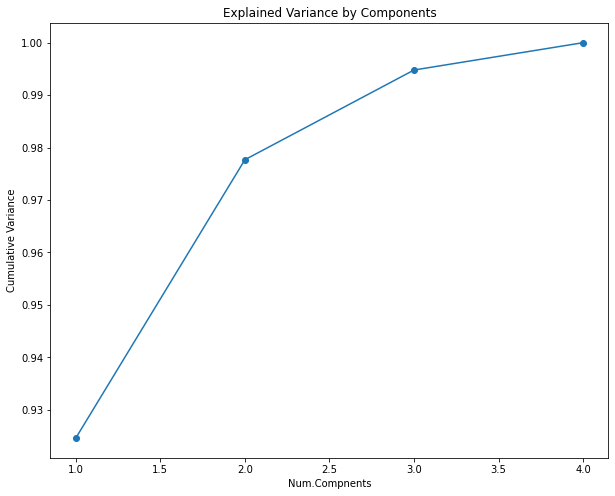

In [32]:
print(pca.explained_variance_ratio_)
plt.figure(figsize=(10,8))
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_.cumsum(),marker='o')
plt.title('Explained Variance by Components')
plt.xlabel('Num.Compnents')
plt.ylabel('Cumulative Variance')

Want to explain around 80% variance, so can chose just 1, but will go with 2 for more inclusion in this case

In [33]:
pca = PCA(n_components=2)
iris_scores = pca.fit_transform(iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
iris_scores

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [34]:
X = iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [35]:
pca_df = pd.concat([iris_df.reset_index(drop=True), pd.DataFrame(iris_scores)],axis=1)
pca_df.columns.values[-2: ]=['Component 1','Component 2']
pca_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Component 1,Component 2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.944110,0.187532
146,6.3,2.5,5.0,1.9,virginica,1.527167,-0.375317
147,6.5,3.0,5.2,2.0,virginica,1.764346,0.078859
148,6.2,3.4,5.4,2.3,virginica,1.900942,0.116628


In [36]:
pcaX = pca_df[['Component 1','Component 2']]
pcaX

,Component 1,Component 2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
...,...,...
145,1.944110,0.187532
146,1.527167,-0.375317
147,1.764346,0.078859
148,1.900942,0.116628


### K-Means Clustering

In [37]:
inert = []
inert_pca =[]
for i in range(1, 11):
    km = KMeans(n_clusters =i, init='k-means++',random_state=42)
    inert.append(km.fit(X).inertia_)
    inert_pca.append(km.fit(pcaX).inertia_)

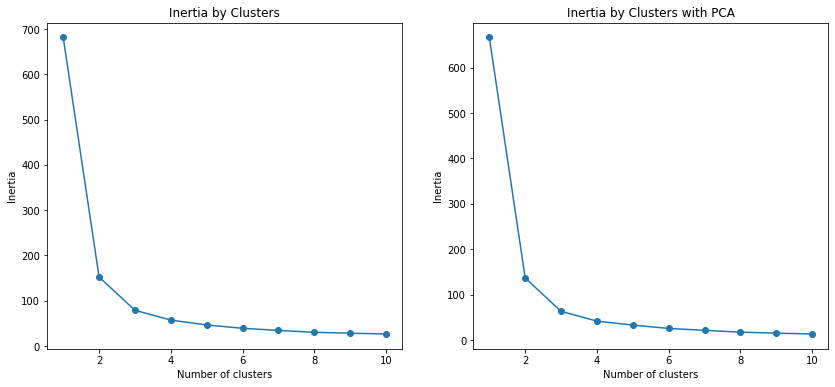

In [38]:
fig,ax=plt.subplots(1,2,figsize=(14,6),num=59)
ax[0].plot(range(1, 11), inert, marker='o')
ax[0].set_title('Inertia by Clusters')
ax[0].set_xlabel('Number of clusters')
ax[0].set_ylabel('Inertia')
ax[1].plot(range(1, 11), inert_pca, marker='o')
ax[1].set_title('Inertia by Clusters with PCA')
ax[1].set_xlabel('Number of clusters')
ax[1].set_ylabel('Inertia')
plt.show()

For both data sets, 3 clusters is where the inertia takes a sharpe turn, so 3 clusters will be used

In [39]:
kmeans = KMeans(n_clusters = 3,init = 'k-means++', random_state = 42)
km_pred = kmeans.fit_predict(X)
km_pred_pca = kmeans.fit_predict(pcaX)

In [40]:
iris_df['KMeans Cluster'] = km_pred
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,KMeans Cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,0
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [41]:
pca_df['KMeans Cluster'] = km_pred_pca
pca_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Component 1,Component 2,KMeans Cluster
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,1
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,1
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,1
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,1
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,1
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.944110,0.187532,0
146,6.3,2.5,5.0,1.9,virginica,1.527167,-0.375317,2
147,6.5,3.0,5.2,2.0,virginica,1.764346,0.078859,0
148,6.2,3.4,5.4,2.3,virginica,1.900942,0.116628,0


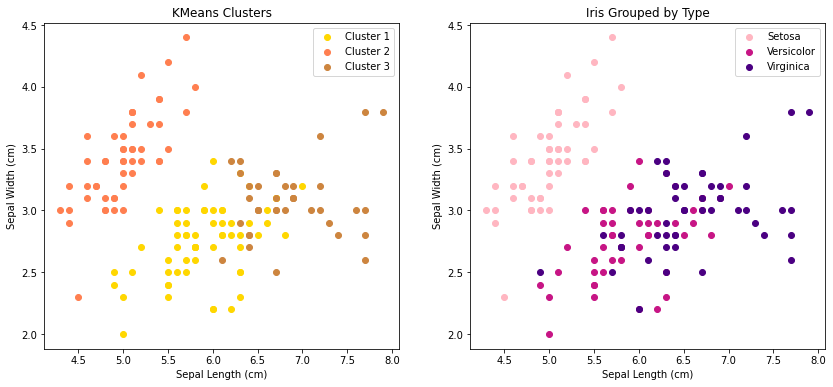

In [42]:
fig,ax=plt.subplots(1,2,figsize=(14,6),num=59)
ax[0].scatter(iris_df[iris_df['KMeans Cluster']==0]['sepal length (cm)'],iris_df[iris_df['KMeans Cluster']==0]['sepal width (cm)'],c = 'gold', label = 'Cluster 1')
ax[0].scatter(iris_df[iris_df['KMeans Cluster']==1]['sepal length (cm)'],iris_df[iris_df['KMeans Cluster']==1]['sepal width (cm)'],c = 'coral', label = 'Cluster 2')
ax[0].scatter(iris_df[iris_df['KMeans Cluster']==2]['sepal length (cm)'],iris_df[iris_df['KMeans Cluster']==2]['sepal width (cm)'],c = 'peru', label = 'Cluster 3')
ax[0].set_title('KMeans Clusters')
ax[0].set_xlabel('Sepal Length (cm)')
ax[0].set_ylabel('Sepal Width (cm)')
ax[0].legend()
ax[1].scatter(iris_df[iris_df['target']=='setosa']['sepal length (cm)'],iris_df[iris_df['target']=='setosa']['sepal width (cm)'],c = 'lightpink', label = 'Setosa')
ax[1].scatter(iris_df[iris_df['target']=='versicolor']['sepal length (cm)'],iris_df[iris_df['target']=='versicolor']['sepal width (cm)'],c = 'mediumvioletred', label = 'Versicolor')
ax[1].scatter(iris_df[iris_df['target']=='virginica']['sepal length (cm)'],iris_df[iris_df['target']=='virginica']['sepal width (cm)'],c = 'indigo', label = 'Virginica')
ax[1].set_title('Iris Grouped by Type')
ax[1].set_xlabel('Sepal Length (cm)')
ax[1].set_ylabel('Sepal Width (cm)')
ax[1].legend()
plt.show()

The model performed well on what we can assume is the setosa flower, matching with cluster 2. However, the versicolor and virginica flowers werw harder to differentiate for the model since they are so intermixed. The model groups the shorter sepal lengths and the longer sepal lengths together which minimal mixing inbetween. 

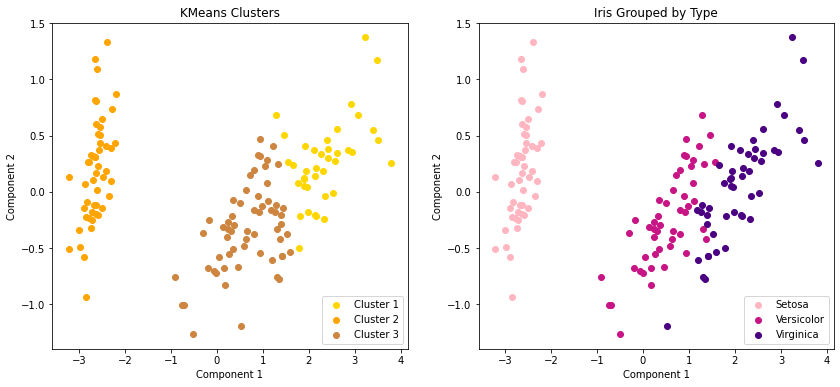

In [43]:
fig,ax=plt.subplots(1,2,figsize=(14,6),num=59)
ax[0].scatter(pca_df[pca_df['KMeans Cluster']==0]['Component 1'],pca_df[pca_df['KMeans Cluster']==0]['Component 2'],c = 'gold', label = 'Cluster 1')
ax[0].scatter(pca_df[pca_df['KMeans Cluster']==1]['Component 1'],pca_df[pca_df['KMeans Cluster']==1]['Component 2'],c = 'orange', label = 'Cluster 2')
ax[0].scatter(pca_df[pca_df['KMeans Cluster']==2]['Component 1'],pca_df[pca_df['KMeans Cluster']==2]['Component 2'],c = 'peru', label = 'Cluster 3')
ax[0].set_title('KMeans Clusters')
ax[0].set_xlabel('Component 1')
ax[0].set_ylabel('Component 2')
ax[0].legend()
ax[1].scatter(pca_df[pca_df['target']=='setosa']['Component 1'],pca_df[pca_df['target']=='setosa']['Component 2'],c = 'lightpink', label = 'Setosa')
ax[1].scatter(pca_df[pca_df['target']=='versicolor']['Component 1'],pca_df[pca_df['target']=='versicolor']['Component 2'],c = 'mediumvioletred', label = 'Versicolor')
ax[1].scatter(pca_df[pca_df['target']=='virginica']['Component 1'],pca_df[pca_df['target']=='virginica']['Component 2'],c = 'indigo', label = 'Virginica')
ax[1].set_title('Iris Grouped by Type')
ax[1].set_xlabel('Component 1')
ax[1].set_ylabel('Component 2')
ax[1].legend()
plt.show()

The PCA KMeans also did fairly well, especailly with cluster 1 which can be assumed to be setosa. The edges of the cluster 2 & 3 are what differe from the actual groupings, which is expected since these flower types were overlapping graphically in the EDA. 

## Afinity Propagation

In [44]:
from sklearn.cluster import AffinityPropagation
ap = AffinityPropagation(random_state=42)
ap_pred = ap.fit_predict(X)
print ("Number of predicted clusters: " + str(len(ap.cluster_centers_)))
iris_df['AP Cluster'] = ap_pred

Number of predicted clusters: 7


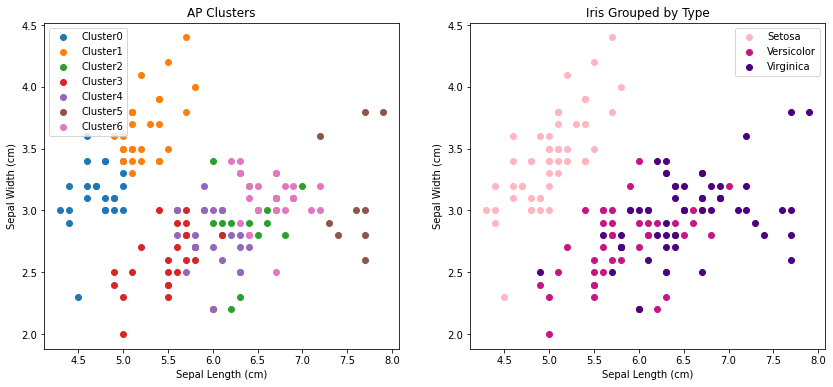

In [45]:
fig,ax=plt.subplots(1,2,figsize=(14,6),num=59)
for i in range(len(ap.cluster_centers_)):
    ax[0].scatter(iris_df[iris_df['AP Cluster']==i]['sepal length (cm)'],iris_df[iris_df['AP Cluster']==i]['sepal width (cm)'],label = 'Cluster'+str(i))
ax[0].set_title('AP Clusters')
ax[0].set_xlabel('Sepal Length (cm)')
ax[0].set_ylabel('Sepal Width (cm)')
ax[0].legend()
ax[1].scatter(iris_df[iris_df['target']=='setosa']['sepal length (cm)'],iris_df[iris_df['target']=='setosa']['sepal width (cm)'],c = 'lightpink', label = 'Setosa')
ax[1].scatter(iris_df[iris_df['target']=='versicolor']['sepal length (cm)'],iris_df[iris_df['target']=='versicolor']['sepal width (cm)'],c = 'mediumvioletred', label = 'Versicolor')
ax[1].scatter(iris_df[iris_df['target']=='virginica']['sepal length (cm)'],iris_df[iris_df['target']=='virginica']['sepal width (cm)'],c = 'indigo', label = 'Virginica')
ax[1].set_title('Iris Grouped by Type')
ax[1].set_xlabel('Sepal Length (cm)')
ax[1].set_ylabel('Sepal Width (cm)')
ax[1].legend()
plt.show()

This clustering technique found many more clusters than we chose to use looking at our graph. It seems to have split each of the 3 true groups into sub groups. This worked very well for setosa, splitting into cluster 0 & 1, but gets more conviluded when differentiating between versicolor and virginica. It becomes hard to tell which of the subgroups belongs to versicolor or virginica

#### Using PCA for Affinity Propagation

In [46]:
ap_pca_pred = ap.fit_predict(pcaX)
print ("Number of predicted  pca clusters: " + str(len(ap.cluster_centers_)))
pca_df['AP Cluster'] = ap_pca_pred

Number of predicted  pca clusters: 8


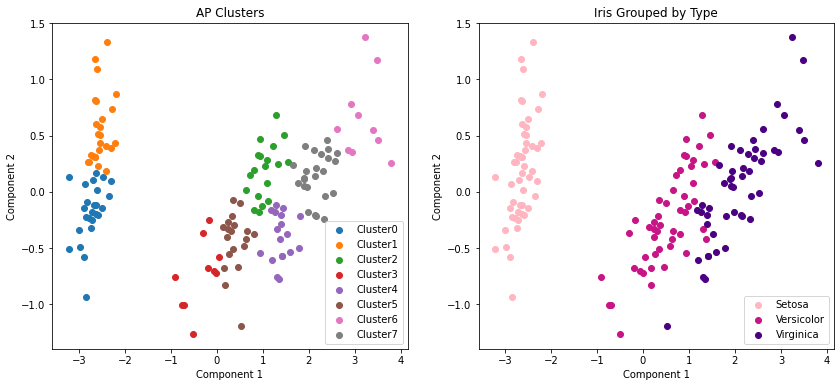

In [47]:
fig,ax=plt.subplots(1,2,figsize=(14,6),num=59)
for i in range(len(ap.cluster_centers_)):
    ax[0].scatter(pca_df[pca_df['AP Cluster']==i]['Component 1'],pca_df[pca_df['AP Cluster']==i]['Component 2'],label = 'Cluster'+str(i))
ax[0].set_title('AP Clusters')
ax[0].set_xlabel('Component 1')
ax[0].set_ylabel('Component 2')
ax[0].legend()
ax[1].scatter(pca_df[pca_df['target']=='setosa']['Component 1'],pca_df[pca_df['target']=='setosa']['Component 2'],c = 'lightpink', label = 'Setosa')
ax[1].scatter(pca_df[pca_df['target']=='versicolor']['Component 1'],pca_df[pca_df['target']=='versicolor']['Component 2'],c = 'mediumvioletred', label = 'Versicolor')
ax[1].scatter(pca_df[pca_df['target']=='virginica']['Component 1'],pca_df[pca_df['target']=='virginica']['Component 2'],c = 'indigo', label = 'Virginica')
ax[1].set_title('Iris Grouped by Type')
ax[1].set_xlabel('Component 1')
ax[1].set_ylabel('Component 2')
ax[1].legend()
plt.show()

The PCA version of AP clustering worked much better when dividng the groups. We can easily see how each flower type is divided into 2 or 3 sub groups, and within those subgroups PCA seems to have accuartly predicted each flower type. We could think of the subgroups as being the flower type, but with shorter or longer petal lengths. 

### Agglomerative Clustering

Agglomerative Clustering is a type of hierarchical clustering. It divides the population into several clusters such that data points in the same cluster are more similar and data points in different clusters are dissimilar.

In [48]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
agg_pred = agg.fit_predict(X)
iris_df['Agglo. Cluster'] = agg_pred
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,KMeans Cluster,AP Cluster,Agglo. Cluster
0,5.1,3.5,1.4,0.2,setosa,1,1,1
1,4.9,3.0,1.4,0.2,setosa,1,0,1
2,4.7,3.2,1.3,0.2,setosa,1,0,1
3,4.6,3.1,1.5,0.2,setosa,1,0,1
4,5.0,3.6,1.4,0.2,setosa,1,1,1
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2,6,2
146,6.3,2.5,5.0,1.9,virginica,0,4,0
147,6.5,3.0,5.2,2.0,virginica,2,6,2
148,6.2,3.4,5.4,2.3,virginica,2,6,2


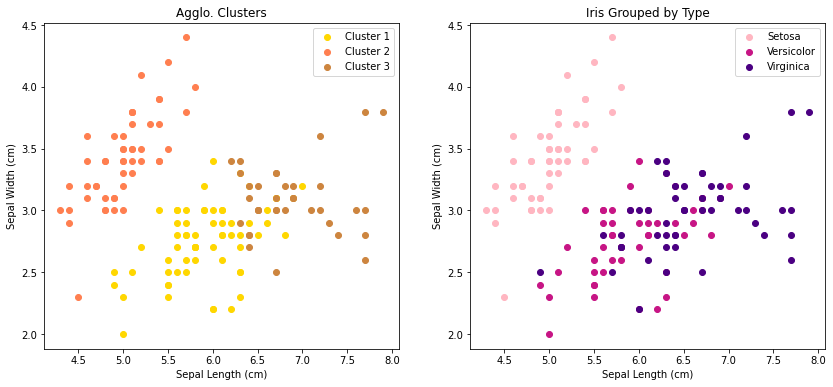

In [49]:
fig,ax=plt.subplots(1,2,figsize=(14,6),num=59)
ax[0].scatter(iris_df[iris_df['Agglo. Cluster']==0]['sepal length (cm)'],iris_df[iris_df['Agglo. Cluster']==0]['sepal width (cm)'],c = 'gold', label = 'Cluster 1')
ax[0].scatter(iris_df[iris_df['Agglo. Cluster']==1]['sepal length (cm)'],iris_df[iris_df['Agglo. Cluster']==1]['sepal width (cm)'],c = 'coral', label = 'Cluster 2')
ax[0].scatter(iris_df[iris_df['Agglo. Cluster']==2]['sepal length (cm)'],iris_df[iris_df['Agglo. Cluster']==2]['sepal width (cm)'],c = 'peru', label = 'Cluster 3')
ax[0].set_title('Agglo. Clusters')
ax[0].set_xlabel('Sepal Length (cm)')
ax[0].set_ylabel('Sepal Width (cm)')
ax[0].legend()
ax[1].scatter(iris_df[iris_df['target']=='setosa']['sepal length (cm)'],iris_df[iris_df['target']=='setosa']['sepal width (cm)'],c = 'lightpink', label = 'Setosa')
ax[1].scatter(iris_df[iris_df['target']=='versicolor']['sepal length (cm)'],iris_df[iris_df['target']=='versicolor']['sepal width (cm)'],c = 'mediumvioletred', label = 'Versicolor')
ax[1].scatter(iris_df[iris_df['target']=='virginica']['sepal length (cm)'],iris_df[iris_df['target']=='virginica']['sepal width (cm)'],c = 'indigo', label = 'Virginica')
ax[1].set_title('Iris Grouped by Type')
ax[1].set_xlabel('Sepal Length (cm)')
ax[1].set_ylabel('Sepal Width (cm)')
ax[1].legend()
plt.show()

Using this type of cluster we are able to see that Setosa was properly clustered, however there is some overlapping when looking at Versicolor and Virginica. This almost looks similar to our K-Means clustering graphs, where Setosa was clearly clustered.

#### Comparing the agglo clustering to our K-means.

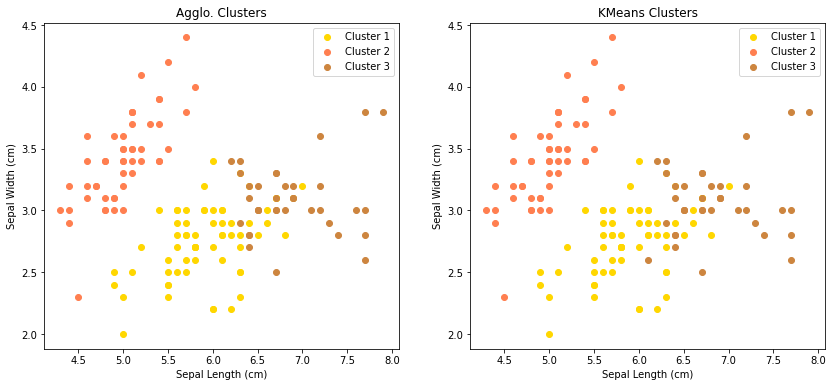

In [50]:
fig,ax=plt.subplots(1,2,figsize=(14,6),num=59)
ax[0].scatter(iris_df[iris_df['Agglo. Cluster']==0]['sepal length (cm)'],iris_df[iris_df['Agglo. Cluster']==0]['sepal width (cm)'],c = 'gold', label = 'Cluster 1')
ax[0].scatter(iris_df[iris_df['Agglo. Cluster']==1]['sepal length (cm)'],iris_df[iris_df['Agglo. Cluster']==1]['sepal width (cm)'],c = 'coral', label = 'Cluster 2')
ax[0].scatter(iris_df[iris_df['Agglo. Cluster']==2]['sepal length (cm)'],iris_df[iris_df['Agglo. Cluster']==2]['sepal width (cm)'],c = 'peru', label = 'Cluster 3')
ax[0].set_title('Agglo. Clusters')
ax[0].set_xlabel('Sepal Length (cm)')
ax[0].set_ylabel('Sepal Width (cm)')
ax[0].legend()
ax[1].scatter(iris_df[iris_df['KMeans Cluster']==0]['sepal length (cm)'],iris_df[iris_df['KMeans Cluster']==0]['sepal width (cm)'],c = 'gold', label = 'Cluster 1')
ax[1].scatter(iris_df[iris_df['KMeans Cluster']==1]['sepal length (cm)'],iris_df[iris_df['KMeans Cluster']==1]['sepal width (cm)'],c = 'coral', label = 'Cluster 2')
ax[1].scatter(iris_df[iris_df['KMeans Cluster']==2]['sepal length (cm)'],iris_df[iris_df['KMeans Cluster']==2]['sepal width (cm)'],c = 'peru', label = 'Cluster 3')
ax[1].set_title('KMeans Clusters')
ax[1].set_xlabel('Sepal Length (cm)')
ax[1].set_ylabel('Sepal Width (cm)')
ax[1].legend()
plt.show()

Comparing the agglo clustering to our K-means, we see slight improvment in the clustering as the object at ~6cm length and ~25. width is correctly clustered in Agglo. comapred to KMeans. Otherwise, they look very similar.  

#### PCA Agglomerative Clustering

In [51]:
agg_pca_pred = agg.fit_predict(pcaX)
pca_df['Agglo. Cluster'] = agg_pca_pred
pca_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Component 1,Component 2,KMeans Cluster,AP Cluster,Agglo. Cluster
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,1,1,1
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,1,0,1
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,1,0,1
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,1,0,1
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,1,1,1
...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.944110,0.187532,0,7,2
146,6.3,2.5,5.0,1.9,virginica,1.527167,-0.375317,2,4,0
147,6.5,3.0,5.2,2.0,virginica,1.764346,0.078859,0,7,2
148,6.2,3.4,5.4,2.3,virginica,1.900942,0.116628,0,7,2


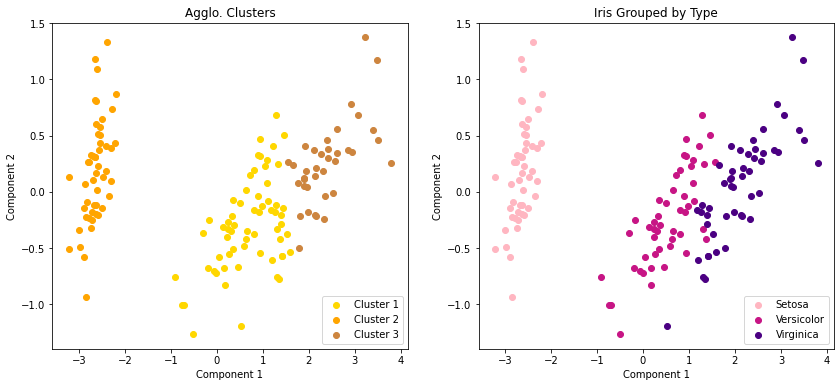

In [52]:
fig,ax=plt.subplots(1,2,figsize=(14,6),num=59)
ax[0].scatter(pca_df[pca_df['Agglo. Cluster']==0]['Component 1'],pca_df[pca_df['Agglo. Cluster']==0]['Component 2'],c = 'gold', label = 'Cluster 1')
ax[0].scatter(pca_df[pca_df['Agglo. Cluster']==1]['Component 1'],pca_df[pca_df['Agglo. Cluster']==1]['Component 2'],c = 'orange', label = 'Cluster 2')
ax[0].scatter(pca_df[pca_df['Agglo. Cluster']==2]['Component 1'],pca_df[pca_df['Agglo. Cluster']==2]['Component 2'],c = 'peru', label = 'Cluster 3')
ax[0].set_title('Agglo. Clusters')
ax[0].set_xlabel('Component 1')
ax[0].set_ylabel('Component 2')
ax[0].legend()
ax[1].scatter(pca_df[pca_df['target']=='setosa']['Component 1'],pca_df[pca_df['target']=='setosa']['Component 2'],c = 'lightpink', label = 'Setosa')
ax[1].scatter(pca_df[pca_df['target']=='versicolor']['Component 1'],pca_df[pca_df['target']=='versicolor']['Component 2'],c = 'mediumvioletred', label = 'Versicolor')
ax[1].scatter(pca_df[pca_df['target']=='virginica']['Component 1'],pca_df[pca_df['target']=='virginica']['Component 2'],c = 'indigo', label = 'Virginica')
ax[1].set_title('Iris Grouped by Type')
ax[1].set_xlabel('Component 1')
ax[1].set_ylabel('Component 2')
ax[1].legend()
plt.show()

Using the PCA's this is a much bigger improvement on clustering where we can easily see three groups with no overlapping. We see Setosa, Versicolor, and Virginica properly clustered. 

### DBSCAN Clustering

In [53]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, metric='euclidean')
dbscan_pred = dbscan.fit_predict(X)
labels = dbscan.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print ("Number of predicted clusters: " + str(n_clusters_))

Number of predicted clusters: 2


In [54]:
iris_df['DBSCAN Cluster']=dbscan_pred
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,KMeans Cluster,AP Cluster,Agglo. Cluster,DBSCAN Cluster
0,5.1,3.5,1.4,0.2,setosa,1,1,1,0
1,4.9,3.0,1.4,0.2,setosa,1,0,1,0
2,4.7,3.2,1.3,0.2,setosa,1,0,1,0
3,4.6,3.1,1.5,0.2,setosa,1,0,1,0
4,5.0,3.6,1.4,0.2,setosa,1,1,1,0
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2,6,2,1
146,6.3,2.5,5.0,1.9,virginica,0,4,0,1
147,6.5,3.0,5.2,2.0,virginica,2,6,2,1
148,6.2,3.4,5.4,2.3,virginica,2,6,2,1


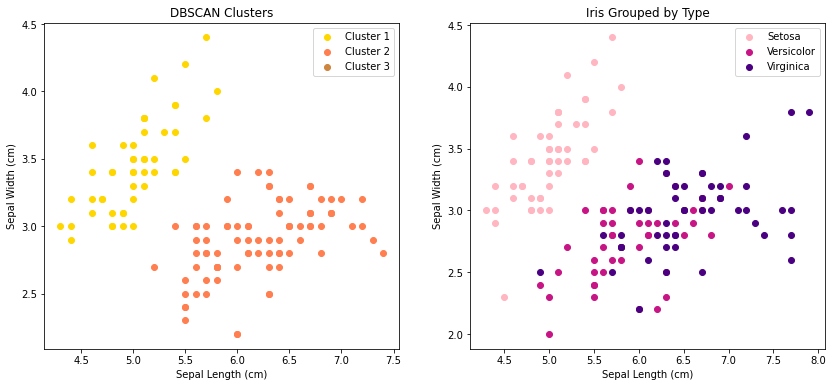

In [55]:
fig,ax=plt.subplots(1,2,figsize=(14,6),num=59)
ax[0].scatter(iris_df[iris_df['DBSCAN Cluster']==0]['sepal length (cm)'],iris_df[iris_df['DBSCAN Cluster']==0]['sepal width (cm)'],c = 'gold', label = 'Cluster 1')
ax[0].scatter(iris_df[iris_df['DBSCAN Cluster']==1]['sepal length (cm)'],iris_df[iris_df['DBSCAN Cluster']==1]['sepal width (cm)'],c = 'coral', label = 'Cluster 2')
ax[0].scatter(iris_df[iris_df['DBSCAN Cluster']==2]['sepal length (cm)'],iris_df[iris_df['DBSCAN Cluster']==2]['sepal width (cm)'],c = 'peru', label = 'Cluster 3')
ax[0].set_title('DBSCAN Clusters')
ax[0].set_xlabel('Sepal Length (cm)')
ax[0].set_ylabel('Sepal Width (cm)')
ax[0].legend()
ax[1].scatter(iris_df[iris_df['target']=='setosa']['sepal length (cm)'],iris_df[iris_df['target']=='setosa']['sepal width (cm)'],c = 'lightpink', label = 'Setosa')
ax[1].scatter(iris_df[iris_df['target']=='versicolor']['sepal length (cm)'],iris_df[iris_df['target']=='versicolor']['sepal width (cm)'],c = 'mediumvioletred', label = 'Versicolor')
ax[1].scatter(iris_df[iris_df['target']=='virginica']['sepal length (cm)'],iris_df[iris_df['target']=='virginica']['sepal width (cm)'],c = 'indigo', label = 'Virginica')
ax[1].set_title('Iris Grouped by Type')
ax[1].set_xlabel('Sepal Length (cm)')
ax[1].set_ylabel('Sepal Width (cm)')
ax[1].legend()
plt.show()

With DBSCAN we do see only two clusters, Cluster 1 and 2, while Cluster 3 has been ommitted since we predicted only 2 clusters. 

#### PCA DBSCAN Clustering

In [56]:
dbscan_pca_pred = dbscan.fit_predict(pcaX)
pca_labels = dbscan.labels_
n_clusters_ = len(set(pca_labels)) - (1 if -1 in pca_labels else 0)
print ("Number of predicted clusters: " + str(n_clusters_))

Number of predicted clusters: 2


In [57]:
pca_df['DBSCAN Cluster']=dbscan_pca_pred
pca_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Component 1,Component 2,KMeans Cluster,AP Cluster,Agglo. Cluster,DBSCAN Cluster
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,1,1,1,0
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,1,0,1,0
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,1,0,1,0
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,1,0,1,0
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.944110,0.187532,0,7,2,1
146,6.3,2.5,5.0,1.9,virginica,1.527167,-0.375317,2,4,0,1
147,6.5,3.0,5.2,2.0,virginica,1.764346,0.078859,0,7,2,1
148,6.2,3.4,5.4,2.3,virginica,1.900942,0.116628,0,7,2,1


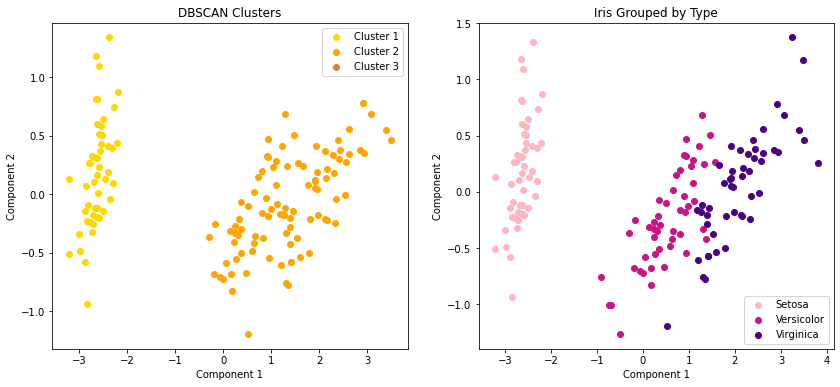

In [58]:
fig,ax=plt.subplots(1,2,figsize=(14,6),num=59)
ax[0].scatter(pca_df[pca_df['DBSCAN Cluster']==0]['Component 1'],pca_df[pca_df['DBSCAN Cluster']==0]['Component 2'],c = 'gold', label = 'Cluster 1')
ax[0].scatter(pca_df[pca_df['DBSCAN Cluster']==1]['Component 1'],pca_df[pca_df['DBSCAN Cluster']==1]['Component 2'],c = 'orange', label = 'Cluster 2')
ax[0].scatter(pca_df[pca_df['DBSCAN Cluster']==2]['Component 1'],pca_df[pca_df['DBSCAN Cluster']==2]['Component 2'],c = 'peru', label = 'Cluster 3')
ax[0].set_title('DBSCAN Clusters')
ax[0].set_xlabel('Component 1')
ax[0].set_ylabel('Component 2')
ax[0].legend()
ax[1].scatter(pca_df[pca_df['target']=='setosa']['Component 1'],pca_df[pca_df['target']=='setosa']['Component 2'],c = 'lightpink', label = 'Setosa')
ax[1].scatter(pca_df[pca_df['target']=='versicolor']['Component 1'],pca_df[pca_df['target']=='versicolor']['Component 2'],c = 'mediumvioletred', label = 'Versicolor')
ax[1].scatter(pca_df[pca_df['target']=='virginica']['Component 1'],pca_df[pca_df['target']=='virginica']['Component 2'],c = 'indigo', label = 'Virginica')
ax[1].set_title('Iris Grouped by Type')
ax[1].set_xlabel('Component 1')
ax[1].set_ylabel('Component 2')
ax[1].legend()
plt.show()

we still obtained two clusters in the predicted, and can clearly see that Setosa is one cluster, while Virginica/Versicolor are in the second cluster. 

### Spectral Clustering

In [59]:
from sklearn.cluster import SpectralClustering
sp = SpectralClustering(n_clusters = 3, random_state=42)
sp_pred = sp.fit_predict(X)
sp_pca_pred = sp.fit_predict(pcaX)

In [60]:
iris_df['Spect. Cluster'] = sp_pred
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,KMeans Cluster,AP Cluster,Agglo. Cluster,DBSCAN Cluster,Spect. Cluster
0,5.1,3.5,1.4,0.2,setosa,1,1,1,0,1
1,4.9,3.0,1.4,0.2,setosa,1,0,1,0,1
2,4.7,3.2,1.3,0.2,setosa,1,0,1,0,1
3,4.6,3.1,1.5,0.2,setosa,1,0,1,0,1
4,5.0,3.6,1.4,0.2,setosa,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2,6,2,1,0
146,6.3,2.5,5.0,1.9,virginica,0,4,0,1,2
147,6.5,3.0,5.2,2.0,virginica,2,6,2,1,0
148,6.2,3.4,5.4,2.3,virginica,2,6,2,1,0


In [61]:
pca_df['Spect. Cluster'] = sp_pca_pred
pca_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Component 1,Component 2,KMeans Cluster,AP Cluster,Agglo. Cluster,DBSCAN Cluster,Spect. Cluster
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,1,1,1,0,1
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,1,0,1,0,1
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,1,0,1,0,1
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,1,0,1,0,1
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.944110,0.187532,0,7,2,1,0
146,6.3,2.5,5.0,1.9,virginica,1.527167,-0.375317,2,4,0,1,2
147,6.5,3.0,5.2,2.0,virginica,1.764346,0.078859,0,7,2,1,0
148,6.2,3.4,5.4,2.3,virginica,1.900942,0.116628,0,7,2,1,0


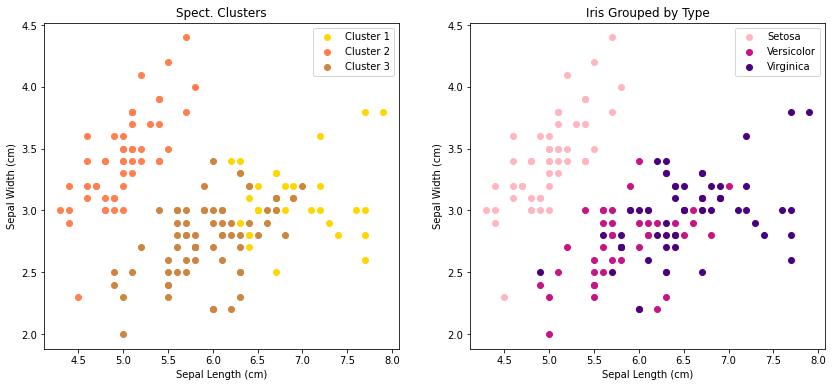

In [62]:
fig,ax=plt.subplots(1,2,figsize=(14,6),num=59)
ax[0].scatter(iris_df[iris_df['Spect. Cluster']==0]['sepal length (cm)'],iris_df[iris_df['Spect. Cluster']==0]['sepal width (cm)'],c = 'gold', label = 'Cluster 1')
ax[0].scatter(iris_df[iris_df['Spect. Cluster']==1]['sepal length (cm)'],iris_df[iris_df['Spect. Cluster']==1]['sepal width (cm)'],c = 'coral', label = 'Cluster 2')
ax[0].scatter(iris_df[iris_df['Spect. Cluster']==2]['sepal length (cm)'],iris_df[iris_df['Spect. Cluster']==2]['sepal width (cm)'],c = 'peru', label = 'Cluster 3')
ax[0].set_title('Spect. Clusters')
ax[0].set_xlabel('Sepal Length (cm)')
ax[0].set_ylabel('Sepal Width (cm)')
ax[0].legend()
ax[1].scatter(iris_df[iris_df['target']=='setosa']['sepal length (cm)'],iris_df[iris_df['target']=='setosa']['sepal width (cm)'],c = 'lightpink', label = 'Setosa')
ax[1].scatter(iris_df[iris_df['target']=='versicolor']['sepal length (cm)'],iris_df[iris_df['target']=='versicolor']['sepal width (cm)'],c = 'mediumvioletred', label = 'Versicolor')
ax[1].scatter(iris_df[iris_df['target']=='virginica']['sepal length (cm)'],iris_df[iris_df['target']=='virginica']['sepal width (cm)'],c = 'indigo', label = 'Virginica')
ax[1].set_title('Iris Grouped by Type')
ax[1].set_xlabel('Sepal Length (cm)')
ax[1].set_ylabel('Sepal Width (cm)')
ax[1].legend()
plt.show()

The model performed well on what we can assume is the setosa flower, matching with cluster 2. However, the versicolor and virginica flowers werw harder to differentiate for the model since they are so intermixed. The model groups the shorter sepal lengths and the longer sepal lengths together which minimal mixing inbetween. 

#### PCA Spectral Clustering

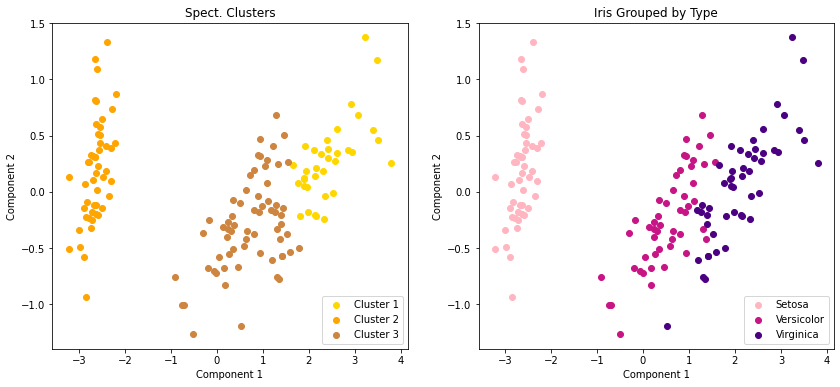

In [63]:
fig,ax=plt.subplots(1,2,figsize=(14,6),num=59)
ax[0].scatter(pca_df[pca_df['Spect. Cluster']==0]['Component 1'],pca_df[pca_df['Spect. Cluster']==0]['Component 2'],c = 'gold', label = 'Cluster 1')
ax[0].scatter(pca_df[pca_df['Spect. Cluster']==1]['Component 1'],pca_df[pca_df['Spect. Cluster']==1]['Component 2'],c = 'orange', label = 'Cluster 2')
ax[0].scatter(pca_df[pca_df['Spect. Cluster']==2]['Component 1'],pca_df[pca_df['Spect. Cluster']==2]['Component 2'],c = 'peru', label = 'Cluster 3')
ax[0].set_title('Spect. Clusters')
ax[0].set_xlabel('Component 1')
ax[0].set_ylabel('Component 2')
ax[0].legend()
ax[1].scatter(pca_df[pca_df['target']=='setosa']['Component 1'],pca_df[pca_df['target']=='setosa']['Component 2'],c = 'lightpink', label = 'Setosa')
ax[1].scatter(pca_df[pca_df['target']=='versicolor']['Component 1'],pca_df[pca_df['target']=='versicolor']['Component 2'],c = 'mediumvioletred', label = 'Versicolor')
ax[1].scatter(pca_df[pca_df['target']=='virginica']['Component 1'],pca_df[pca_df['target']=='virginica']['Component 2'],c = 'indigo', label = 'Virginica')
ax[1].set_title('Iris Grouped by Type')
ax[1].set_xlabel('Component 1')
ax[1].set_ylabel('Component 2')
ax[1].legend()
plt.show()

Using the PCA's this is a much bigger improvement on clustering where we can easily see three groups with no overlapping. We see Setosa, Versicolor, and Virginica properly clustered. 

### Hierarchial Dendrogram - Centroid Linkage

In [64]:
from scipy.cluster.hierarchy import dendrogram, linkage

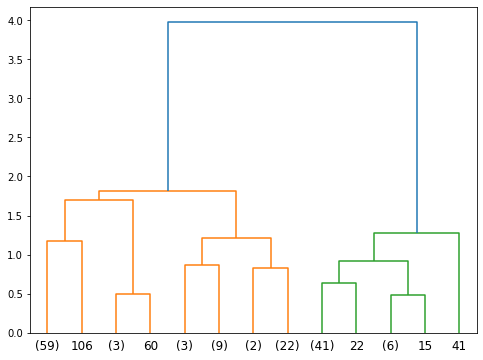

In [65]:
links = linkage(X,'centroid')
plt.figure(figsize=(8, 6))
points=range(1, 11)
dendrogram(links, orientation='top', distance_sort="descending", truncate_mode="level", p=3, show_leaf_counts=True)
plt.show()

In this dendrogram, if we draw a horizontal line, we will see two cluster groups. Then with in each cluster is subclusters. On the left side we see much more branches than the right side of the dendrogram. 

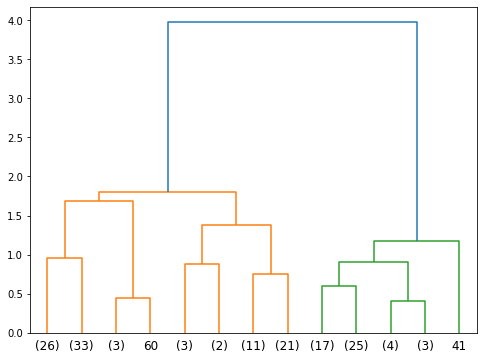

In [66]:
links = linkage(pcaX,'centroid')
plt.figure(figsize=(8, 6))
dendrogram(links, orientation='top', distance_sort="descending", truncate_mode="level", p=3, show_leaf_counts=True)
plt.show()

In this dendrogram when using the PCAs, if we draw a horizontal line, we will see two cluster groups. Then with in each cluster is subclusters. We see fewer branches on the left side as we did in the non PCA dendrogram meaning that some of the points got re-clustered when using the PCAs. 

### Conclusion

Since we reduced the dimensions of an already low dimension dataset, the result was a loss of important features that helped to distinguish the different clusters of data points. As expected, the overlap between the Virginica and Versicolor (which we saw through the EDA) ended up being indistinguishable through clustering and was therefore less accurate overall. However when we performed PCA Spectral Clustering, there was a much bigger improvement on clustering and we could easily see Setosa, Versicolor, and Virginica properly clustered. 

# Naïve Bayes and other classification techniques 

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.tree import DecisionTreeClassifier

iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

models = [LogisticRegression(solver="lbfgs", max_iter=500),
         RandomForestClassifier(n_estimators=100, random_state=42),
         GaussianNB(),
         DecisionTreeClassifier(random_state=42)]

X = iris_df.drop(columns='target')
y = iris_df['target']

for model in models:
    print()
    print(model)   
    model.fit(X, y)
    print("Test Accuracy: {}%".format(round(model.score(X, y)*100, 2)))
    print("Naive Bayes Classifier report: \n\n", classification_report(y, model.predict(X)))


LogisticRegression(max_iter=500)
Test Accuracy: 97.33%
Naive Bayes Classifier report: 

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        50
         1.0       0.98      0.94      0.96        50
         2.0       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150


RandomForestClassifier(random_state=42)
Test Accuracy: 100.0%
Naive Bayes Classifier report: 

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        50
         1.0       1.00      1.00      1.00        50
         2.0       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150


GaussianNB()
Test Accuracy: 96.0%
Naive Bayes Clas

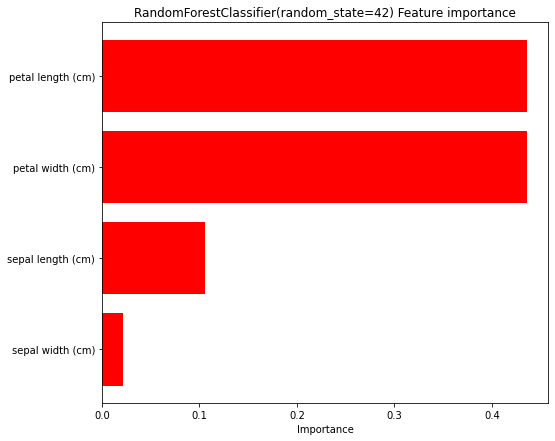

In [86]:
feature_importance = models[1].feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(8,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="red")
plt.yticks(range(len(sorted_idx)), iris_df.columns[sorted_idx])
plt.xlabel('Importance')
plt.title('RandomForestClassifier(random_state=42) Feature importance')
plt.draw()
plt.show()

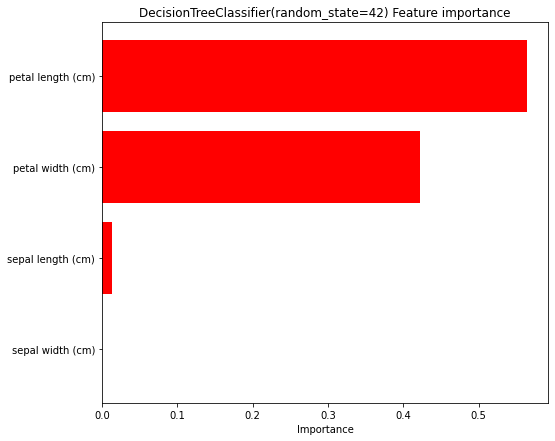

In [87]:
feature_importance = models[3].feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(8,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="red")
plt.yticks(range(len(sorted_idx)), iris_df.columns[sorted_idx])
plt.xlabel('Importance')
plt.title('DecisionTreeClassifier(random_state=42) Feature importance')
plt.draw()
plt.show()

In [89]:
pca_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Component 1,Component 2,KMeans Cluster,AP Cluster,Agglo. Cluster,DBSCAN Cluster,Spect. Cluster
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,1,1,1,0,1
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,1,0,1,0,1
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,1,0,1,0,1
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,1,0,1,0,1
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.944110,0.187532,0,7,2,1,0
146,6.3,2.5,5.0,1.9,virginica,1.527167,-0.375317,2,4,0,1,2
147,6.5,3.0,5.2,2.0,virginica,1.764346,0.078859,0,7,2,1,0
148,6.2,3.4,5.4,2.3,virginica,1.900942,0.116628,0,7,2,1,0


In [90]:

X = pca_df.drop(columns=['target','KMeans Cluster', 'AP Cluster', 'Agglo. Cluster', 'DBSCAN Cluster', 'Spect. Cluster'])
y = pca_df['target']

for model in models:
    print()
    print(model)   
    model.fit(X, y)
    print("Test Accuracy: {}%".format(round(model.score(X, y)*100, 2)))
    print("Naive Bayes Classifier report: \n\n", classification_report(y, model.predict(X)))


LogisticRegression(max_iter=500)
Test Accuracy: 98.0%
Naive Bayes Classifier report: 

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       1.00      0.94      0.97        50
   virginica       0.94      1.00      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150


RandomForestClassifier(random_state=42)
Test Accuracy: 100.0%
Naive Bayes Classifier report: 

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       1.00      1.00      1.00        50
   virginica       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150


GaussianNB()
Test Accuracy: 96.0%
Naive Bayes Class

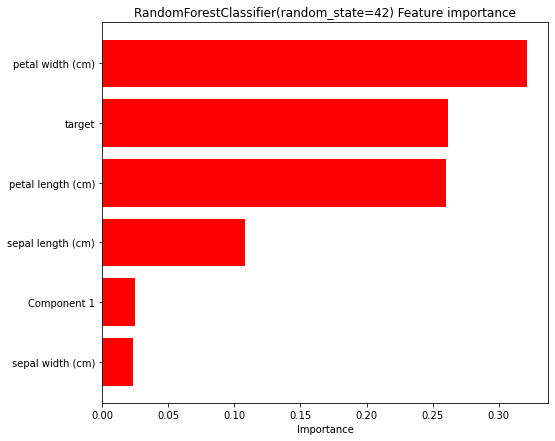

In [92]:
feature_importance = models[1].feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(8,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="red")
plt.yticks(range(len(sorted_idx)), pca_df.columns[sorted_idx])
plt.xlabel('Importance')
plt.title('RandomForestClassifier(random_state=42) Feature importance')
plt.draw()
plt.show()

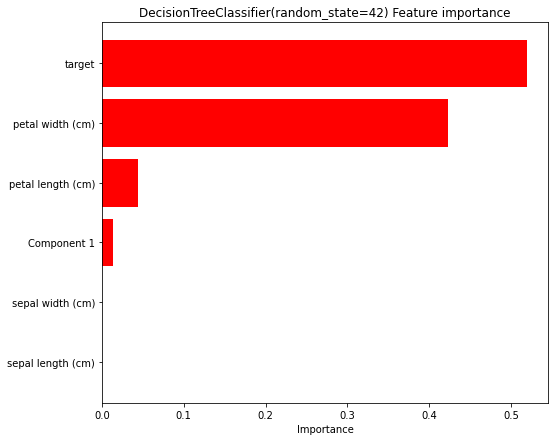

In [93]:
feature_importance = models[3].feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(8,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="red")
plt.yticks(range(len(sorted_idx)), pca_df.columns[sorted_idx])
plt.xlabel('Importance')
plt.title('DecisionTreeClassifier(random_state=42) Feature importance')
plt.draw()
plt.show()

### Conclusion

Throughout the term, we used pattern mining, clustering, and finally classification and bayesian theory to analyze the Iris dataset. While many of the pattern mining techniques failed to differentiate between the "versicolor" and "virginica" iris types, clustering doing better, we see that the best techniques came from classification and naive bayes.The key difference between naive bayes and random forest being their model size. The naive bayes model size is low and quite constant with respect to the data and is a safe choice since it cannot represent complex behavior so it won't get into over fitting. Ultimately we found that the random forest model performed better than the naive bayes method and was therefore the best classifier. While both the random forest and the decision tree got 100% accuracy, we picked the random forest as the best model, since it is unlikely to have an issue of overfitting like the decision tree. 